In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

2023-10-22 01:21:55.183094: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 01:21:55.221722: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 01:21:55.221762: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 01:21:55.221783: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 01:21:55.229257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 01:21:55.230529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
DATASET = 'ita_teleco'
SEED = 42
N = 150
SEQ = 6

In [3]:
tf.random.set_seed(SEED)
np.random.seed(SEED)
plt.rcParams['figure.figsize'] = [10, 8]

In [4]:
def load_data(seq_len, n):
    csv = f'out/{DATASET}/data/ts_real_fake.csv'

    data = pd.read_csv(csv)

    real = data.real
    real = real.to_numpy()[:n * seq_len]
    real = np.reshape(real, (-1, seq_len))
    real = MinMaxScaler().fit_transform(real)

    fake = data.fake
    fake = fake.to_numpy()[:n * seq_len]
    fake = np.reshape(fake, (-1, seq_len))
    fake = MinMaxScaler().fit_transform(fake)

    return real, fake

In [5]:
def fig_path(fig_name): return f'out/{DATASET}/figures/KMEANS_{fig_name}'

In [6]:
real, fake = load_data(SEQ, N)
rand = np.random.rand(N, SEQ)

Estimated number of clusters: 2
Estimated number of noise points: 0


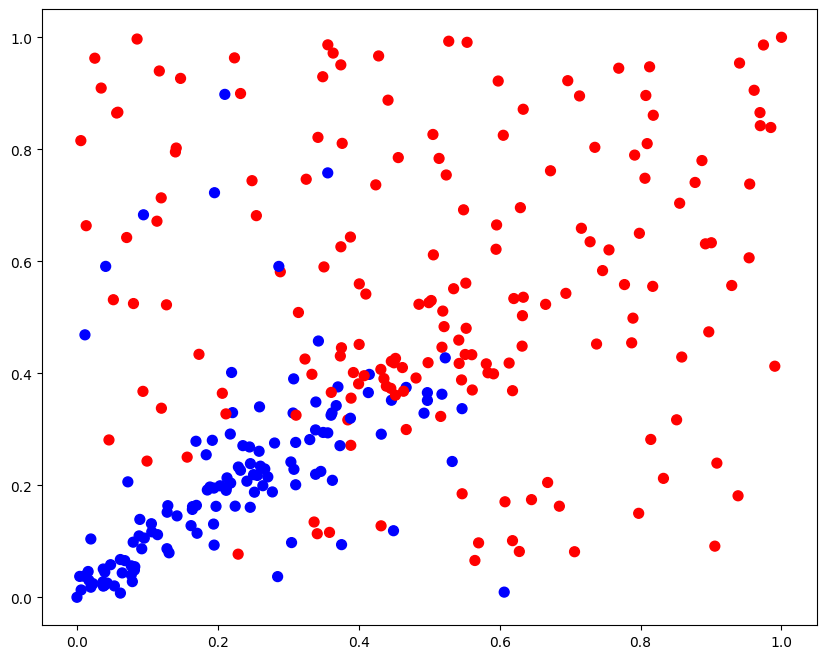

In [7]:
dataX = np.vstack((real, rand))
np.random.shuffle(dataX)

db = KMeans(n_clusters=2, random_state=SEED, n_init='auto').fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


colors = ['red' if label == 1 else 'blue' for label in labels]

plt.scatter(x = dataX[:,0], y=dataX[:,1], c=colors, s=50);
plt.savefig(fig_path('real_random'))

Estimated number of clusters: 2
Estimated number of noise points: 0


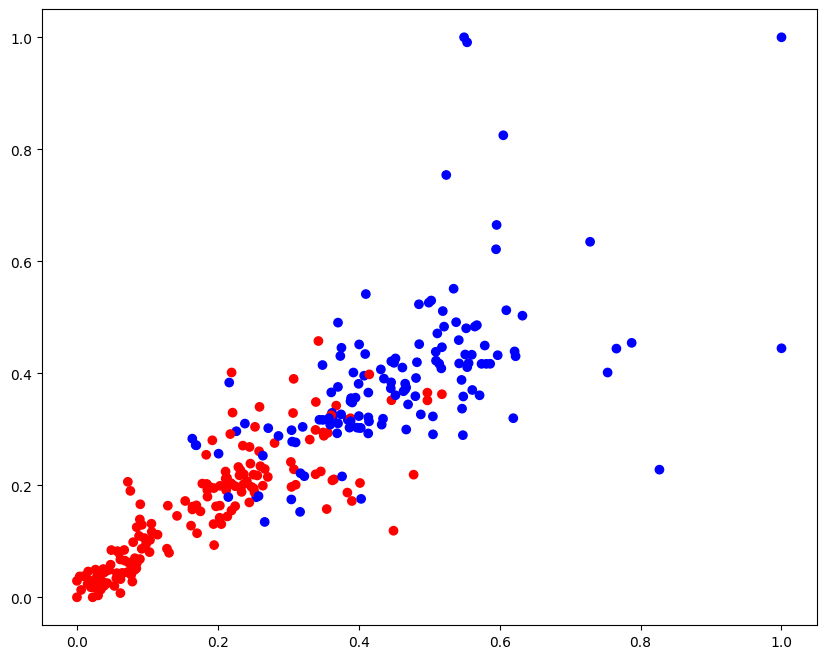

In [8]:
dataX = np.vstack((real, fake))
np.random.shuffle(dataX)

db = KMeans(n_clusters=2, random_state=SEED, n_init='auto').fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

colors = ['red' if label == 1 else 'blue' for label in labels]
plt.scatter(x = dataX[:,0], y=dataX[:,1], c=colors);
plt.savefig(fig_path('real_fake'))

In [14]:
dataX[:,1]

array([0.35858061, 0.41970863, 0.23261324, 0.34003055, 0.02757355,
       0.38150252, 0.43836282, 0.02367828, 0.75409239, 0.35185048,
       0.31677028, 0.32903259, 0.41864801, 0.27652643, 0.16358577,
       0.00745087, 0.29653305, 0.38344107, 0.31677178, 0.01308278,
       0.48330643, 0.32299054, 0.15754043, 0.51106719, 0.19925048,
       0.04602238, 0.02901507, 0.04461506, 0.21898654, 0.17866838,
       0.15252622, 0.52608969, 0.05816245, 0.31970848, 0.13067747,
       0.2802851 , 0.44652952, 0.43904236, 0.17196192, 0.04312855,
       0.23864395, 0.09839561, 0.48592429, 0.62145776, 0.0493831 ,
       1.        , 0.54146888, 0.3422605 , 0.21494982, 0.44462913,
       0.1568904 , 0.383828  , 0.20299461, 0.20177986, 0.42655196,
       0.3235856 , 0.15504496, 0.31409906, 0.05453671, 0.42252221,
       0.41757236, 0.02429233, 0.22456129, 0.40139052, 0.45152114,
       0.21895055, 0.03404358, 0.17971197, 0.21757857, 0.29362156,
       0.03729646, 0.40141994, 0.2105776 , 0.12937306, 0.21624